Q1

In [194]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

In [195]:
df = pd.read_csv('heart.csv')

In [196]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [197]:
X = df.drop('target', axis=1)
Y = df['target']

In [198]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [199]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [200]:
scaler = StandardScaler()

In [201]:
scaled_X = scaler.fit_transform(X)

In [202]:
scaled_X

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [203]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size=0.3, random_state=0)

In [204]:
knn = KNeighborsClassifier(n_neighbors=1)

In [205]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [206]:
predictions = knn.predict(X_test)

In [207]:
accuracy_score(Y_test, predictions)

1.0

In [208]:
confusion_matrix(Y_test, predictions)

array([[145,   0],
       [  0, 163]])

In [209]:
accuracies= {}
for i in range(1,251):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)
    accuracies[i] = accuracy_score(Y_test,predictions)

In [210]:
neighborMax = max(accuracies, key = accuracies.get)
neighborMin = min(accuracies, key= accuracies.get)

In [211]:
print(neighborMax, "neighbors provide the max accuracy: ", accuracies[neighborMax])
print(neighborMin, "neighbors provide the minimum accuracy: ", accuracies[neighborMin])


1 neighbors provide the max accuracy:  1.0
232 neighbors provide the minimum accuracy:  0.8181818181818182


Q2

In [212]:
accuracies.clear()
knn = KNeighborsClassifier(n_neighbors=1)
for i in range (1,11):
    X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size=0.3, random_state=i)
    knn.fit(X_train, Y_train)
    accuracies[i]=accuracy_score(Y_test, knn.predict(X_test))

In [213]:
seedMax = max(accuracies, key = accuracies.get)
seedMin = min(accuracies, key= accuracies.get)

In [214]:
print(seedMax, "seed value provides the max accuracy: ", accuracies[seedMax])
print(seedMin, "seed value provides the minimum accuracy: ", accuracies[seedMin])


4 seed value provides the max accuracy:  1.0
10 seed value provides the minimum accuracy:  0.9512987012987013


Q3

In [215]:
import numpy as np
import matplotlib.pyplot as plt

In [216]:
df = pd.read_csv('dermatology.data')
df.replace('?', np.nan, inplace = True)
df.head()

,2,2.1,0,3,0.1,0.2,0.3,0.4,1,0.5,...,0.19,0.20,3.2,0.21,0.22,0.23,1.1,0.24,55,2.3
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2


In [217]:
df.isnull().sum()

2       0
2.1     0
0       0
3       0
0.1     0
0.2     0
0.3     0
0.4     0
1       0
0.5     0
0.6     0
0.7     0
0.8     0
0.9     0
0.10    0
3.1     0
2.2     0
0.11    0
0.12    0
0.13    0
0.14    0
0.15    0
0.16    0
0.17    0
0.18    0
0.19    0
0.20    0
3.2     0
0.21    0
0.22    0
0.23    0
1.1     0
0.24    0
55      8
2.3     0
dtype: int64

In [218]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
df = pd.DataFrame(imputer.fit_transform(df))

In [219]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [220]:
knn = KNeighborsClassifier(n_neighbors=5)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=4)
knn.fit(X_train, Y_train)



KNeighborsClassifier()

In [221]:
predictions = knn.predict(X_test)


In [222]:
accuracy_score(Y_test, predictions)

0.7818181818181819

In [223]:
cm = confusion_matrix(Y_test, predictions)

In [224]:
cm


array([[28,  1,  0,  0,  0,  0],
       [ 0, 13,  0,  6,  0,  1],
       [ 0,  0, 20,  0,  0,  0],
       [ 0,  3,  0, 13,  1,  0],
       [ 3,  1,  0,  7,  9,  0],
       [ 0,  0,  0,  1,  0,  3]])

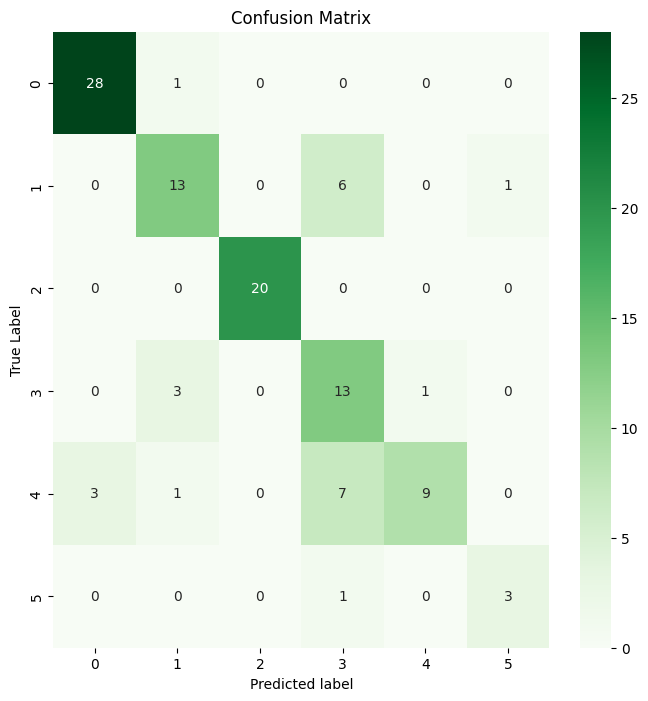

In [225]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot = True, fmt='d', cmap = 'Greens')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.show()

In [226]:
from sklearn.model_selection import cross_val_score, KFold

In [227]:
scores = cross_val_score(knn, X, Y, cv=10)


In [228]:
scores

array([0.89189189, 0.83783784, 0.81081081, 0.86486486, 0.91891892,
       0.86111111, 0.88888889, 0.88888889, 0.97222222, 0.83333333])

In [229]:
scores.mean()

np.float64(0.8768768768768769)